In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [42]:
from get_aq_data import get_flo_data_new, ID_to_name, TICKS_TWO_HOURLY, annotate_boxplot

In [3]:
data, hourly_mean, daily_mean = get_flo_data_new()

In [26]:
lockdown = daily_mean['2020-03-23':'2020-06-01'].mean(axis=1)
nonlockdown = daily_mean['2019-03-23':'2019-06-01'].mean(axis=1)

In [27]:
lockdown.index = ((lockdown.index-lockdown.index[0]) / pd.Timedelta(1.0,unit='D')) + 1
nonlockdown.index = ((nonlockdown.index-nonlockdown.index[0]) / pd.Timedelta(1.0,unit='D')) + 1

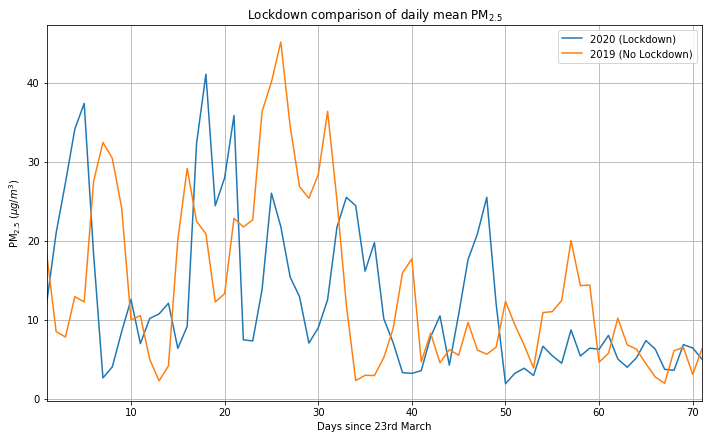

In [29]:
ax = lockdown.plot(figsize=(10, 6), label="2020 (Lockdown)")
nonlockdown.plot(ax=ax, label="2019 (No Lockdown)")
plt.legend()
plt.xlabel("Days since 23rd March")
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.grid()
plt.tight_layout()
plt.title("Lockdown comparison of daily mean $\mathrm{PM}_{2.5}$")
plt.savefig("graphs2020/Lockdown_Comparison_Timeseries.png", dpi=300)

In [30]:
lockdown = data['2020-03-23':'2020-06-01'].mean(axis=1)
nonlockdown = data['2019-03-23':'2019-06-01'].mean(axis=1)

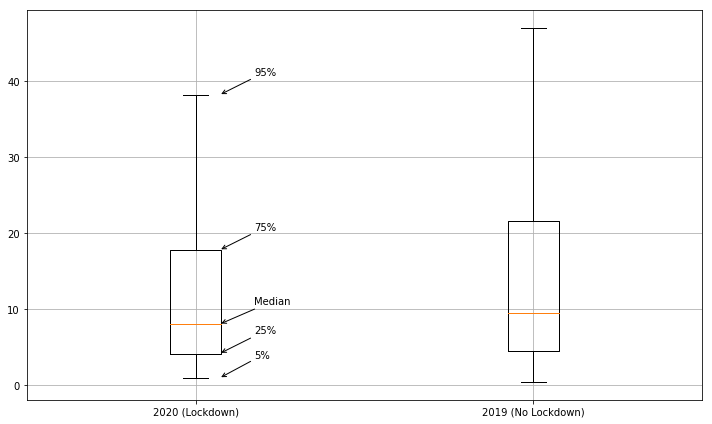

In [48]:
plt.figure(figsize=(10, 6))
bpdict = plt.boxplot([lockdown, nonlockdown], labels=["2020 (Lockdown)", "2019 (No Lockdown)"], showfliers=False)
annotate_boxplot(bpdict, x_offset=0.07)
figsize=(10, 6)
plt.grid()
plt.tight_layout()
plt.savefig("graphs2020/Lockdown_Comparison_Boxplot.png", dpi=300)

In [64]:
stats = pd.DataFrame({'lockdown': lockdown.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]), 'non-lockdown': nonlockdown.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])})
stats.drop(["std", "count"], axis=0, inplace=True)
stats.to_csv('graphs2020/Lockdown_Comparison_Stats.csv')

In [66]:
stats['lockdown'] - stats['non-lockdown']

mean   -1.643647
min     0.521032
5%      0.273681
25%    -0.406987
50%    -1.510451
75%    -3.840365
95%    -2.969283
max     5.368167
dtype: float64